Dataset loaded successfully!
race_count:
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

average_age_men:
39.4

percentage_bachelors:
16.4

percentage_higher_education_rich:
46.5

percentage_lower_education_rich:
17.4

min_work_hours:
1

rich_percentage_min_workers:
10.0

highest_earning_country:
Iran

highest_earning_country_percentage:
41.9

top_IN_occupation:
Prof-specialty



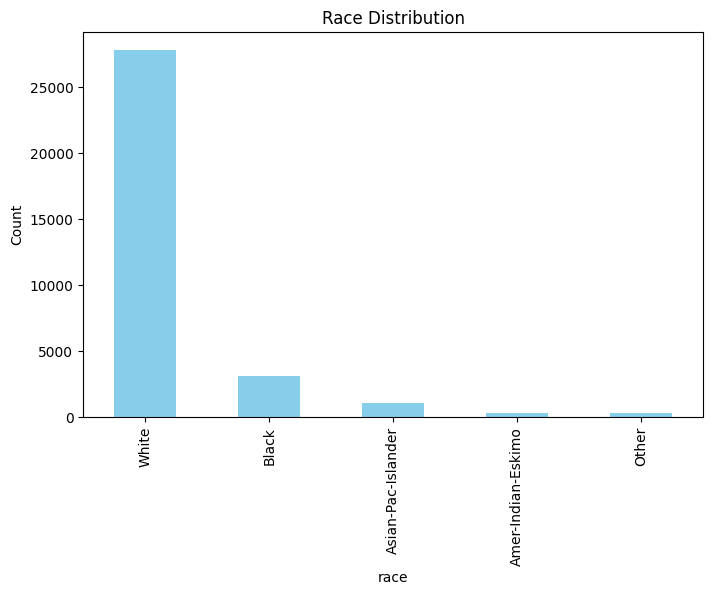

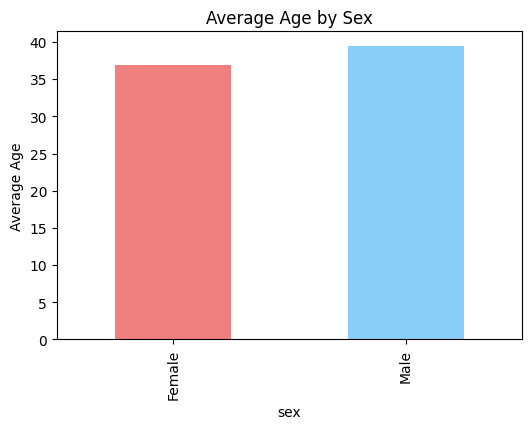

<Figure size 800x500 with 0 Axes>

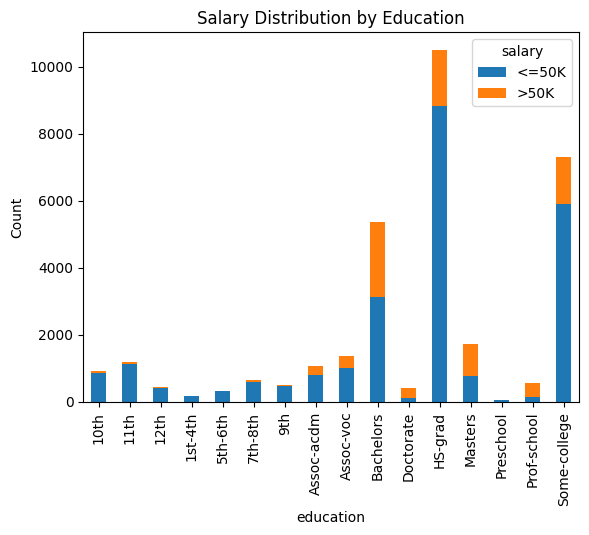

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'salary'
]

df = pd.read_csv(url, names=columns, sep=r',\s*', engine='python')
print("Dataset loaded successfully!")
df.head()

# 2️⃣ Demographic Analyzer function
def analyze_demographics(df):
    # 1. Race count
    race_count = df['race'].value_counts()

    # 2. Average age of men
    average_age_men = round(df[df['sex'] == 'Male']['age'].mean(), 1)

    # 3. Percentage of people with Bachelor's degree
    percentage_bachelors = round((df['education'] == 'Bachelors').mean() * 100, 1)

    # 4. Percentage with advanced education making >50K
    higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
    higher_education_rich = higher_education[higher_education['salary'] == '>50K']
    percentage_higher_education_rich = round((len(higher_education_rich) / len(higher_education)) * 100, 1)

    # 5. Percentage without advanced education making >50K
    lower_education = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
    lower_education_rich = lower_education[lower_education['salary'] == '>50K']
    percentage_lower_education_rich = round((len(lower_education_rich) / len(lower_education)) * 100, 1)

    # 6. Minimum work hours
    min_work_hours = df['hours-per-week'].min()

    # 7. Percentage of people who work minimum hours and earn >50K
    min_workers = df[df['hours-per-week'] == min_work_hours]
    rich_min_workers = min_workers[min_workers['salary'] == '>50K']
    rich_percentage_min_workers = round((len(rich_min_workers) / len(min_workers)) * 100, 1)

    # 8. Country with highest % of >50K earners
    country_counts = df['native-country'].value_counts()
    rich_by_country = df[df['salary'] == '>50K']['native-country'].value_counts()
    highest_earning_country_percentage = round((rich_by_country / country_counts * 100).max(), 1)
    highest_earning_country = (rich_by_country / country_counts * 100).idxmax()

    # 9. Most popular occupation for >50K earners in India
    india_rich = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]
    top_IN_occupation = india_rich['occupation'].value_counts().idxmax() if not india_rich.empty else None

    return {
        "race_count": race_count,
        "average_age_men": average_age_men,
        "percentage_bachelors": percentage_bachelors,
        "percentage_higher_education_rich": percentage_higher_education_rich,
        "percentage_lower_education_rich": percentage_lower_education_rich,
        "min_work_hours": min_work_hours,
        "rich_percentage_min_workers": rich_percentage_min_workers,
        "highest_earning_country": highest_earning_country,
        "highest_earning_country_percentage": highest_earning_country_percentage,
        "top_IN_occupation": top_IN_occupation
    }

# 3️⃣ Run analyzer
results = analyze_demographics(df)
for key, value in results.items():
    print(f"{key}:")
    print(value)
    print()

# 4️⃣ Optional Graphs

# Race distribution
plt.figure(figsize=(8,5))
df['race'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Race Distribution")
plt.ylabel("Count")
plt.show()

# Average age by sex
plt.figure(figsize=(6,4))
df.groupby('sex')['age'].mean().plot(kind='bar', color=['lightcoral','lightskyblue'])
plt.title("Average Age by Sex")
plt.ylabel("Average Age")
plt.show()

# Salary distribution by education
plt.figure(figsize=(8,5))
pd.crosstab(df['education'], df['salary']).plot(kind='bar', stacked=True)
plt.title("Salary Distribution by Education")
plt.ylabel("Count")
plt.show()
